Accuracy: 0.33
Classification Report:
                   precision    recall  f1-score   support

      book_flight       0.00      0.00      0.00         1
       book_hotel       1.00      0.50      0.67         2
         carry_on       0.00      0.00      0.00         2
    flight_status       0.00      0.00      0.00         1
     lost_luggage       0.00      0.00      0.00         1
     out_of_scope       0.31      1.00      0.47         4
        translate       0.00      0.00      0.00         1
     travel_alert       0.00      0.00      0.00         1
travel_suggestion       0.00      0.00      0.00         2

         accuracy                           0.33        15
        macro avg       0.15      0.17      0.13        15
     weighted avg       0.22      0.33      0.21        15



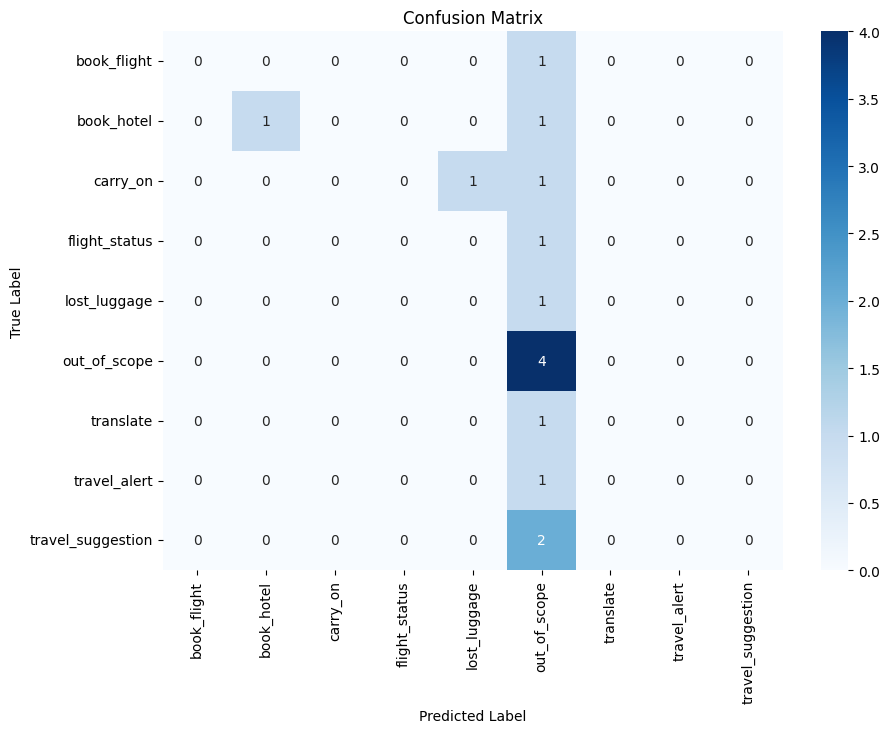

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('../data/preprocessed_dataset.csv')

# Features and labels
X = df['text']
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
conf_matrix_df = pd.DataFrame(conf_matrix, index=nb_classifier.classes_, columns=nb_classifier.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()